In [10]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_alpha_matrix(image_path):
    img = Image.open(image_path)
    
    img = img.convert("RGBA")
    
    pixels = np.array(img)
    
    alpha_channel = pixels[:, :, 3]
    
    return alpha_channel

In [31]:
images_path = "../images"

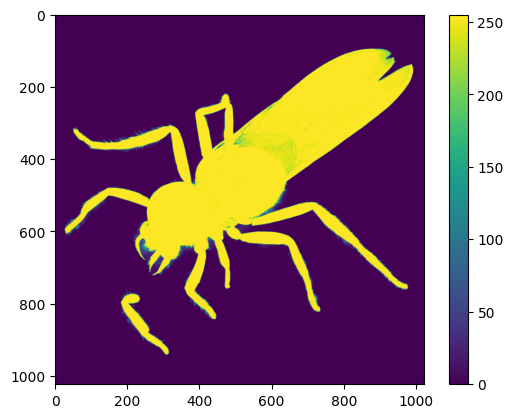

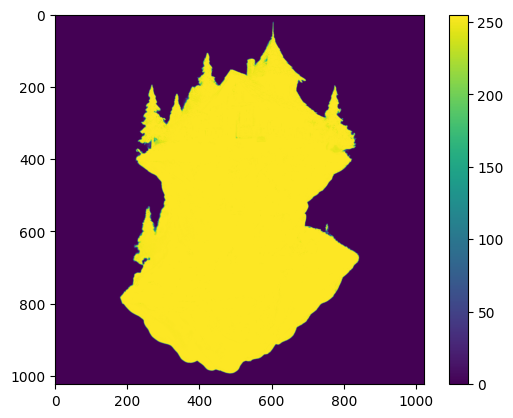

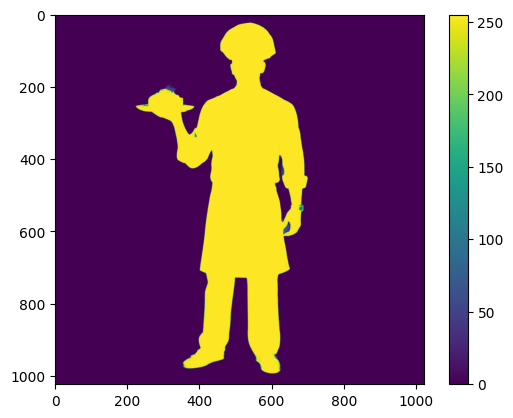

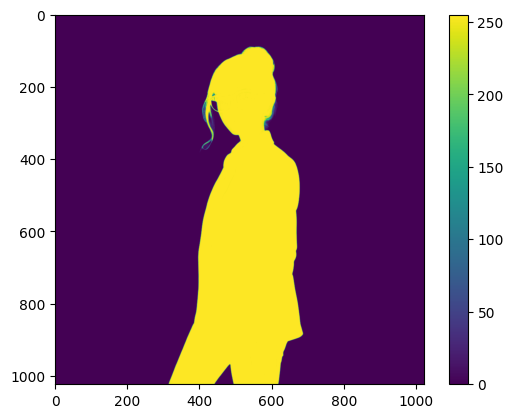

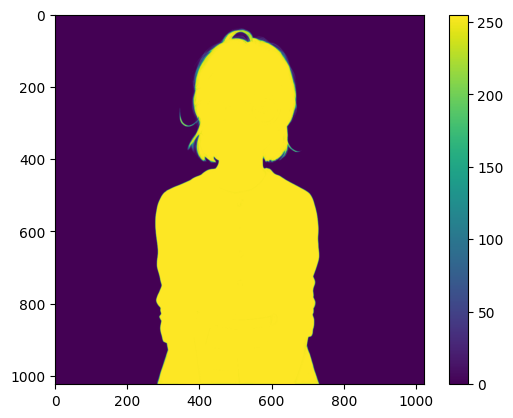

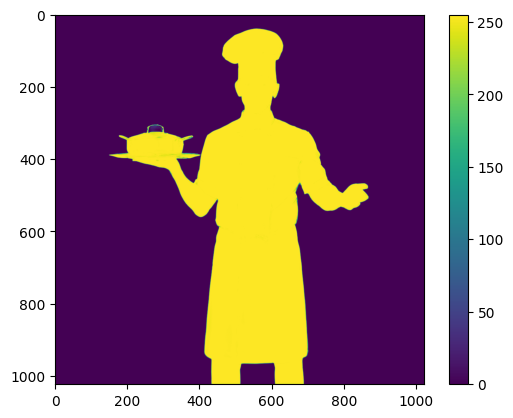

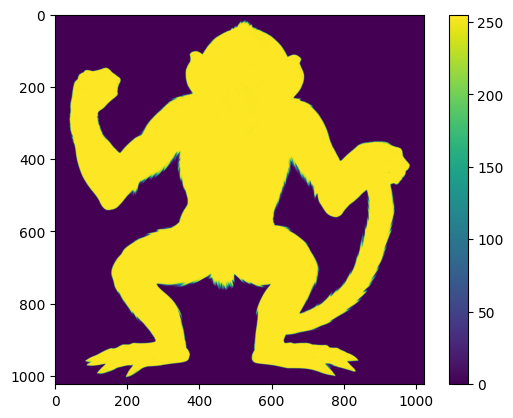

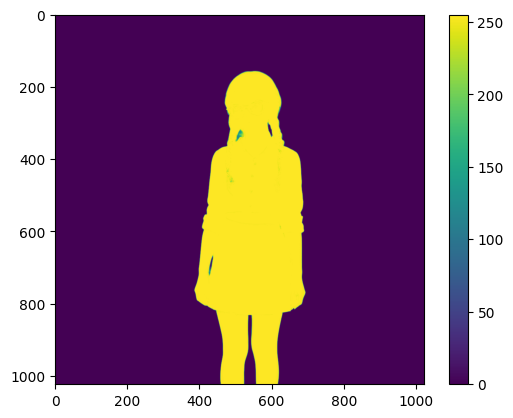

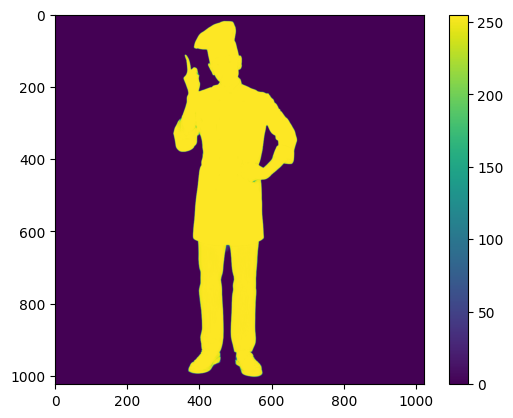

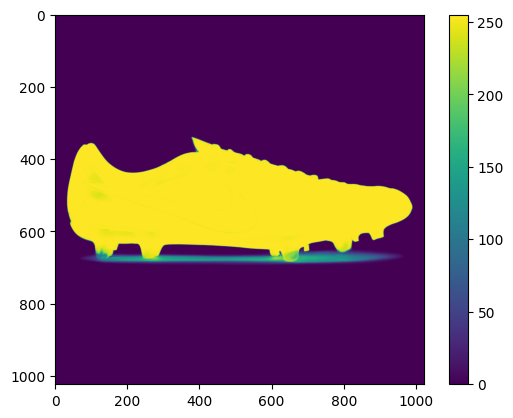

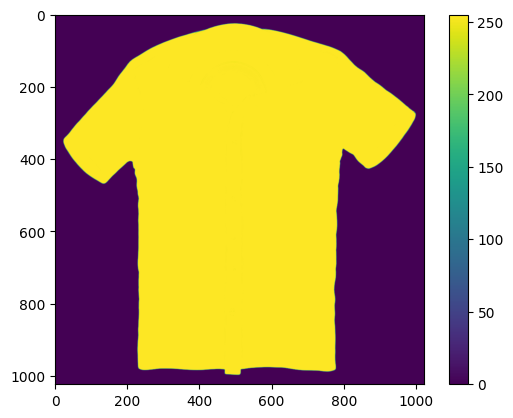

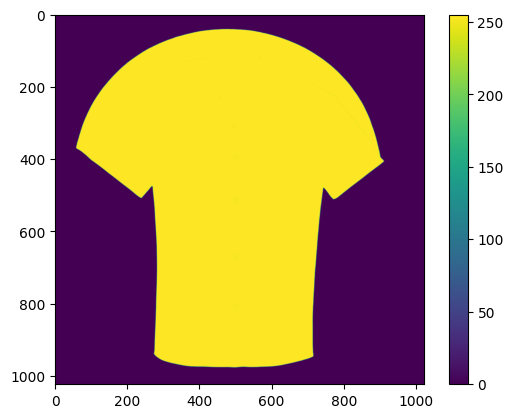

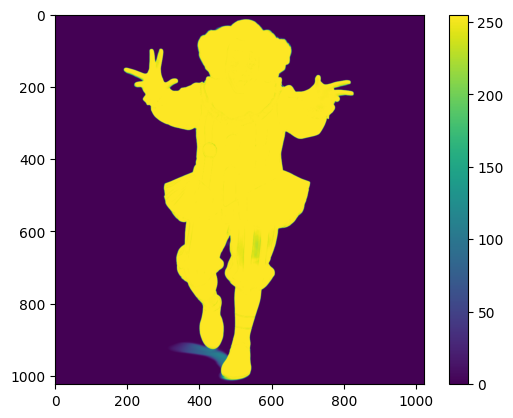

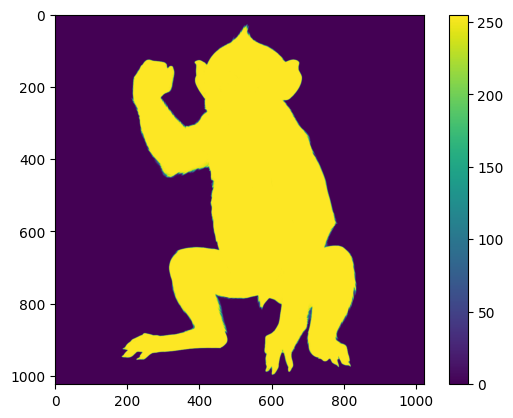

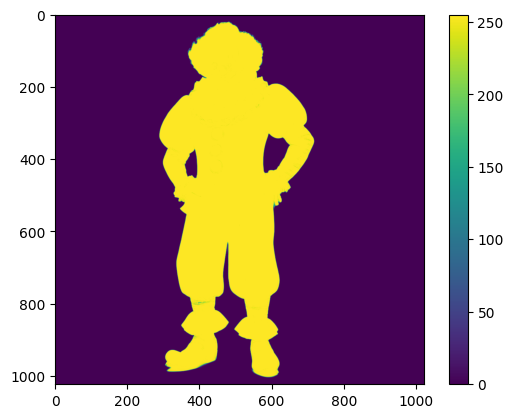

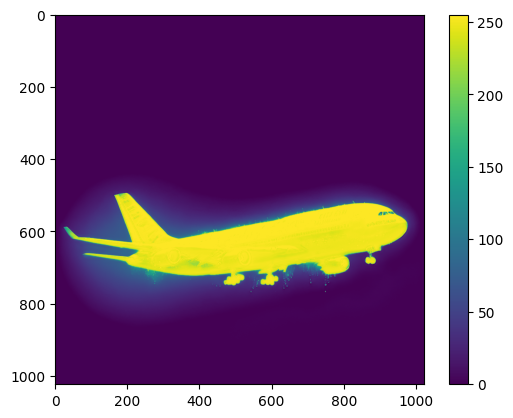

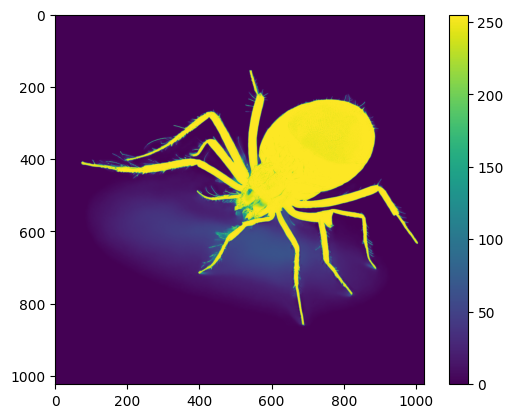

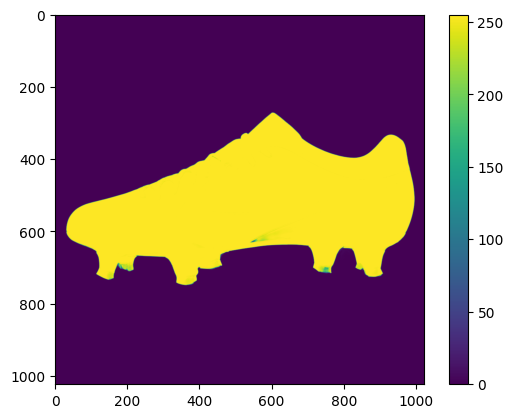

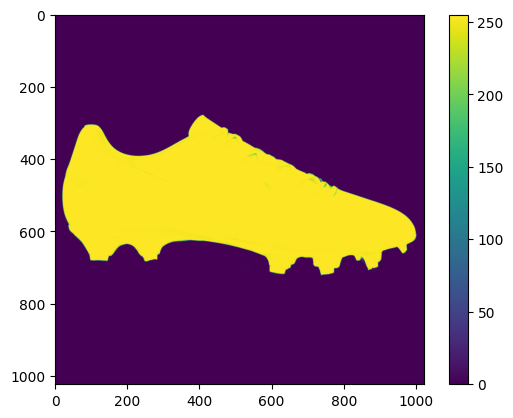

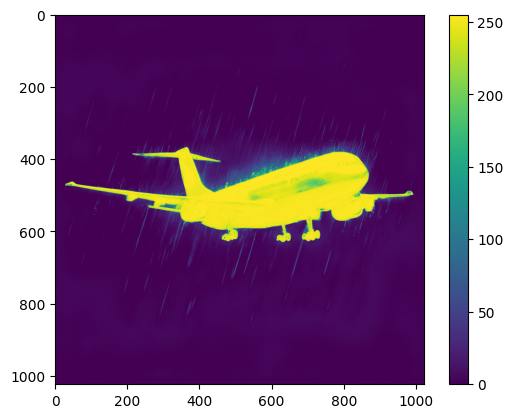

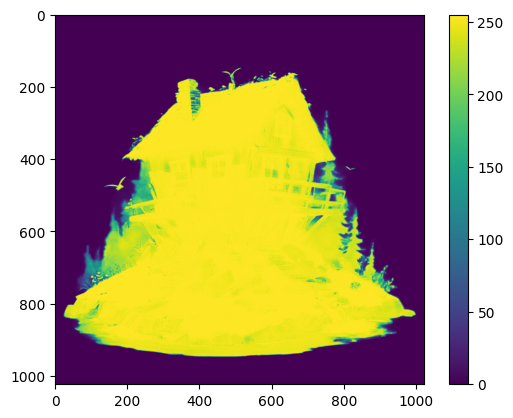

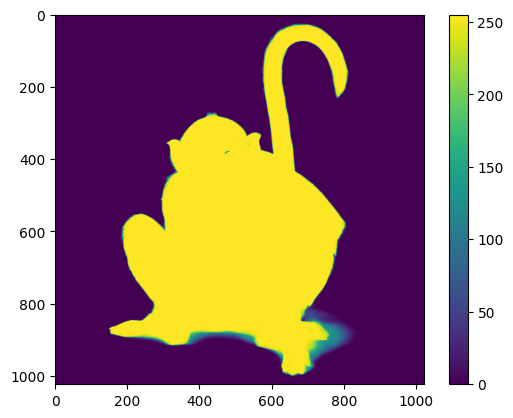

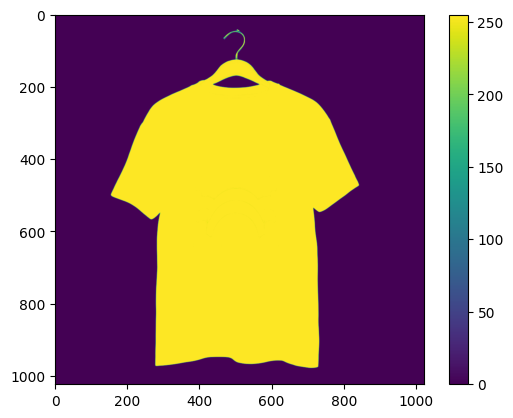

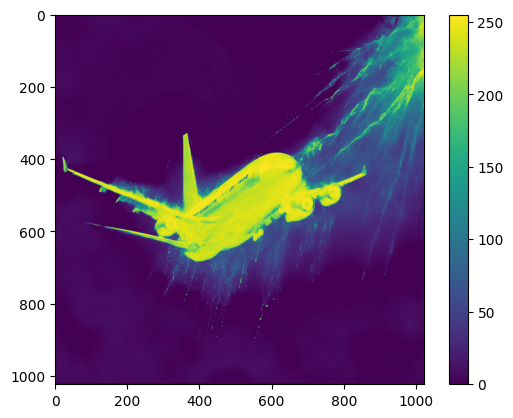

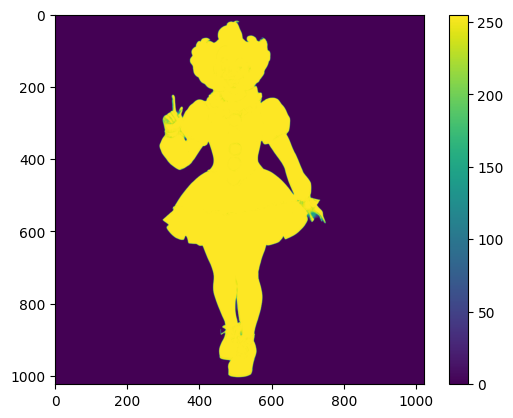

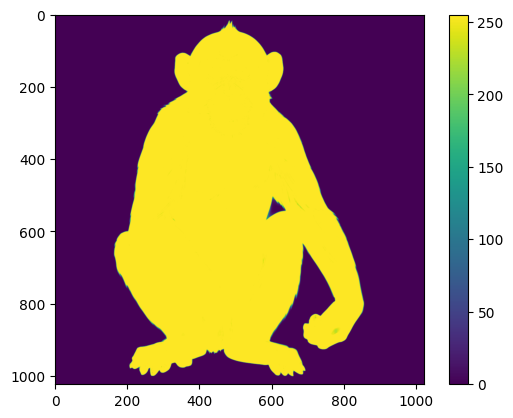

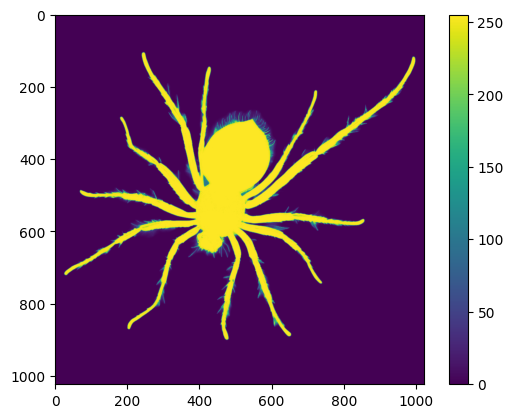

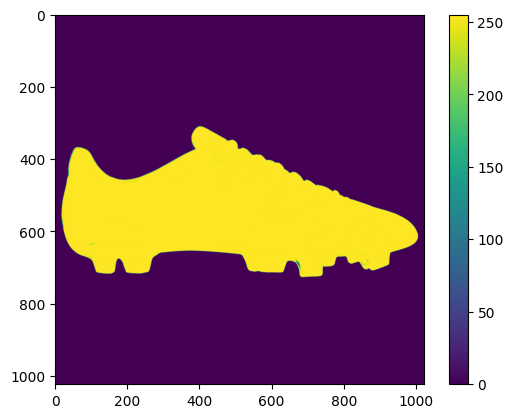

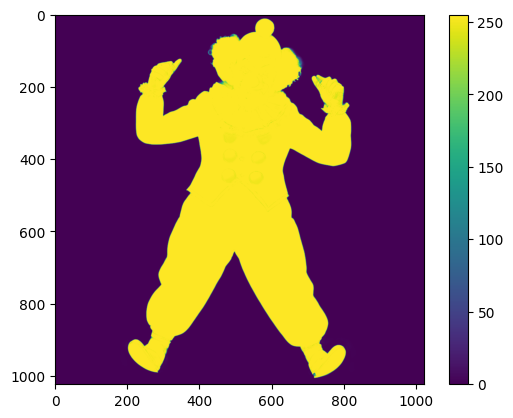

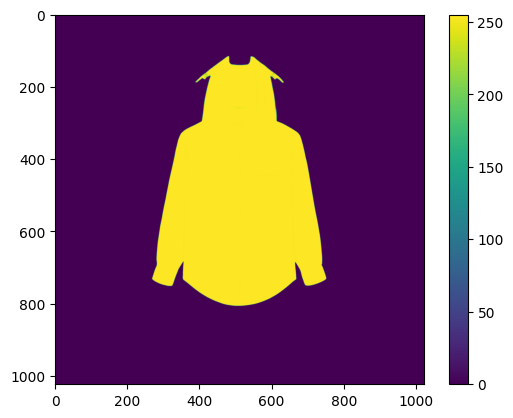

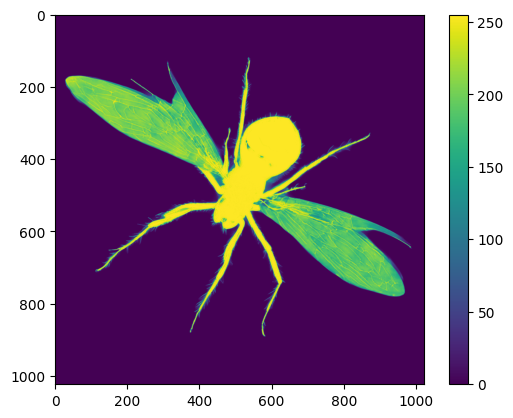

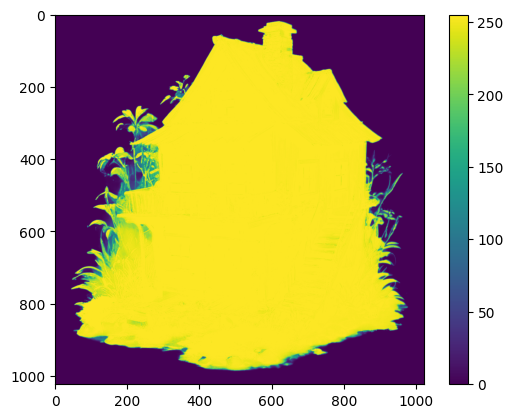

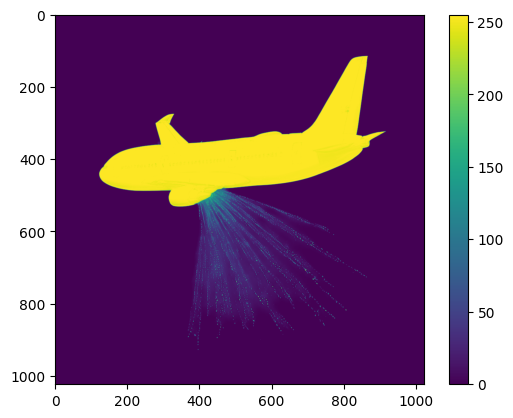

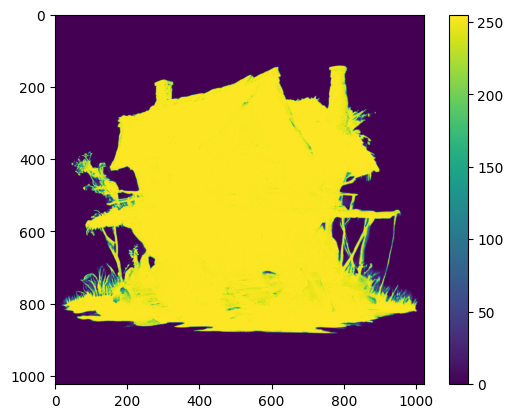

In [34]:
import os
images = os.listdir(images_path)
for image in images:
    alpha_matrix = get_alpha_matrix(f"{images_path}/{image}")

    fig, ax = plt.subplots()
    im = ax.imshow(alpha_matrix)
    fig.colorbar(im, ax=ax)
    plt.show()